# Hand written Digit Recognition TensorFlow Convolution Neural Network 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data();
X_train.shape

(60000, 28, 28)

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

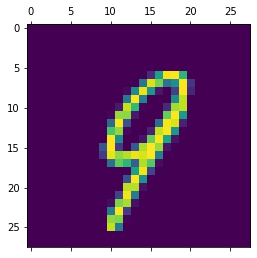

In [4]:
plt.matshow(X_train[22])

In [5]:
y_train[22]

9

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=40, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2013 - accuracy: 0.9385
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0616 - accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9885


[0.038311492651700974, 0.9884999990463257]

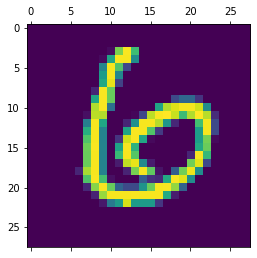

In [11]:
plt.matshow(X_test[11])

In [13]:
test_pred=cnn.predict(X_test)
test_pred[11]

313/313 [==============================] - 1s 2ms/step


array([2.0573095e-08, 1.7434239e-15, 4.4106608e-14, 5.9200569e-17,
       3.1430529e-12, 1.3078676e-08, 1.0000000e+00, 4.4298727e-19,
       9.3840900e-11, 3.7381755e-19], dtype=float32)

In [15]:
y_pred_labels=[np.argmax(i) for i in test_pred]

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

